In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
circ = QuantumCircuit(2)

In [3]:
circ.h(0)
circ.x(1)
circ.h(1)

# identity function
circ.cx(0, 1)

circ.h(0)

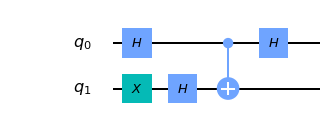

In [4]:
circ.draw()

In [5]:
meas = QuantumCircuit(2, 1)

In [6]:
meas.barrier(range(2))

In [7]:
meas.measure(range(1),range(1))

In [8]:
qc = circ+meas

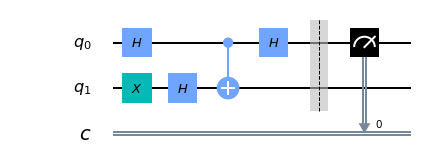

In [9]:
qc.draw()

In [10]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [11]:
counts = result_sim.get_counts(qc)
print(counts)

{'1': 1024}
